**Group**: G3 

**members**:
- Salma Jermoun
- Asmaa El Meziane
- Hasfa El Bahtari
- Mohamed Lahlami 

# ANALYSE DES DONNEES: netflix data 

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Reading the data

In [88]:
data  = pd.read_csv('netflix.csv')
data.head(5) # taking a look at the data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### 1- Top 5 best categories:
To get the top 5 best categories, we will first have to `split()` the catergories' list for each row with the delimiter ', ', then we will use `stack()` to turn it into a single column, `value_counts()` to count how many instances of each category exist in the data, and finally `head()` to get the top five.

In [8]:
top_categories = data['listed_in'].str.split(', ', expand=True).stack().value_counts().head(5)
print(top_categories)

International Movies      2752
Dramas                    2427
Comedies                  1674
International TV Shows    1351
Documentaries              869
Name: count, dtype: int64


#### Visualization
To visualize the popular categories, we will use the same data from the previous block to create a bar blot by applying `plot(kind = 'bar')` to it, the attribute `title` add a title to the plot, we also changed the number of rows shows in `head()` to view more of the data.

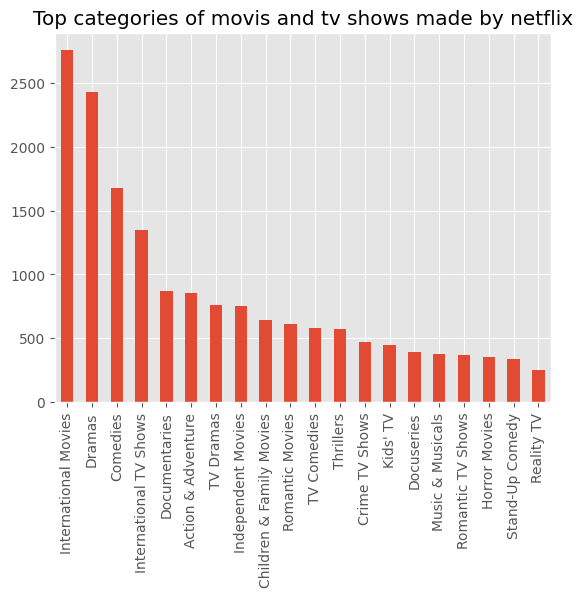

In [29]:
data['listed_in'].str.split(', ', expand=True).stack().value_counts().head(20).plot(kind = 'bar', title = 'Top categories of movis and tv shows made by netflix')
plt.show() #to hide object info

### 2- Top 5 directors:
To get the top 5 directors, we will use `value_counts()` and  `head()` in the same manner as in the previous block, no need for any string manipulation for this question.

In [10]:
top_directors = data['director'].value_counts().head(5)
print(top_directors)

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Name: count, dtype: int64


#### Visualization
To visualize the popular directors, we will use the same data from the previous block, the logic is the same as the last question.

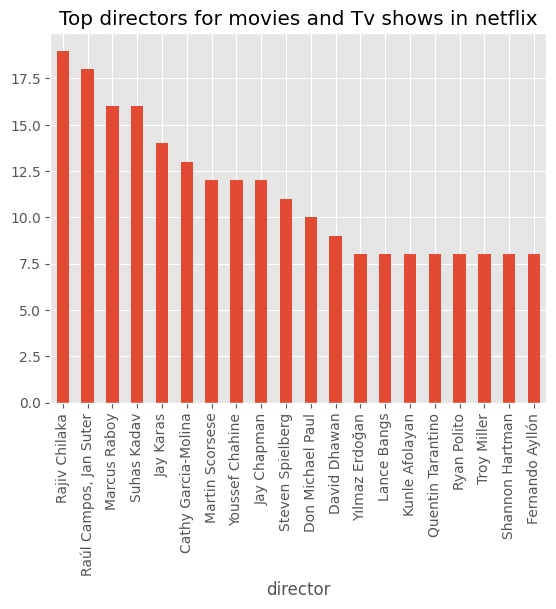

In [50]:
data['director'].value_counts().head(20).plot(kind = 'bar', title = 'Top directors for movies and Tv shows in netflix')
plt.show() #to hide object info

### 3- Top 10 actors:
To get the top 10 actors, we will use the same code from the first question on the "cast" column.

In [33]:
all_actors = data['cast'].str.split(', ', expand=True).stack().value_counts().head(10)
print(all_actors)

Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
Name: count, dtype: int64


#### Visualization
The same code for the previous questions applies here.

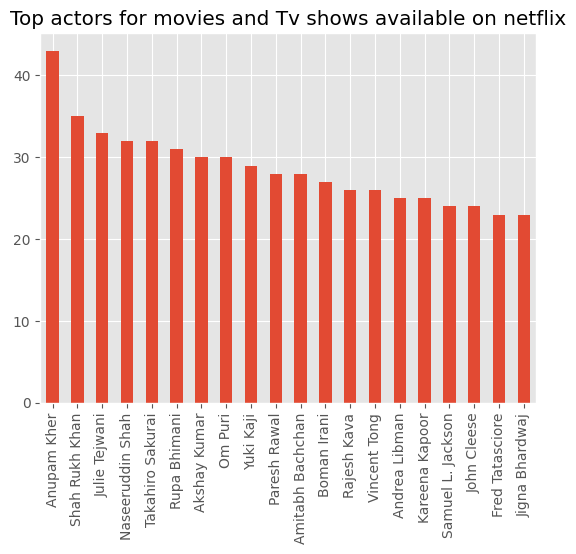

In [49]:
data['cast'].str.split(', ', expand=True).stack().value_counts().head(20).plot(kind = 'bar', title = 'Top actors for movies and Tv shows available on netflix')
plt.show() #to hide object info

### 4- best TV series with the most seasons
To get the TV shows with the most seasons, we will first isolate the rows with TV show as type, then perform a copy of the resulting dataFrame to avoid a warning about modifying the original dataframe, next, we will extract the number from each duration column using a regular expression and `astype(int)` function, finally, we will select the top 5 TV shows by number of seasons and then display their titles and number of seasons.

In [83]:
tv_series = data[data['type'] == 'TV Show']
tv_series_copy = tv_series.copy()
tv_series_copy['num_seasons'] = tv_series_copy['duration'].str.extract(r'(\d+)').astype(int)
top_tv_series = tv_series_copy.nlargest(5, 'num_seasons')[['title', 'num_seasons']]
print(top_tv_series)

                       title  num_seasons
548           Grey's Anatomy           17
2423            Supernatural           15
4798                    NCIS           15
1354               Heartland           13
4220  COMEDIANS of the world           13


#### Visualization

<Axes: title={'center': 'best TV series with the most seasons on netflix'}>

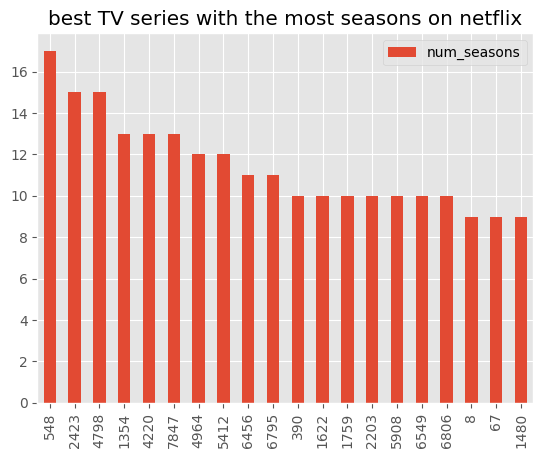

In [86]:
tv_series_copy.nlargest(20, 'num_seasons')[['title', 'num_seasons']].plot(kind = 'bar', title = "best TV series with the most seasons on netflix")

### 5- identifying similar content by matching textual characteristics
In order to compare the textual characteristics of the contents, we iterated through all the descriptions to get the most commen phrases, here are the top 5:

In [71]:
common_words = data['description'].str.split(', ', expand=True).stack().value_counts().head(5)
print(common_words)

In this documentary       16
In this reality series     7
D.C.                       7
In the near future         5
however                    5
Name: count, dtype: int64


#### Visualization

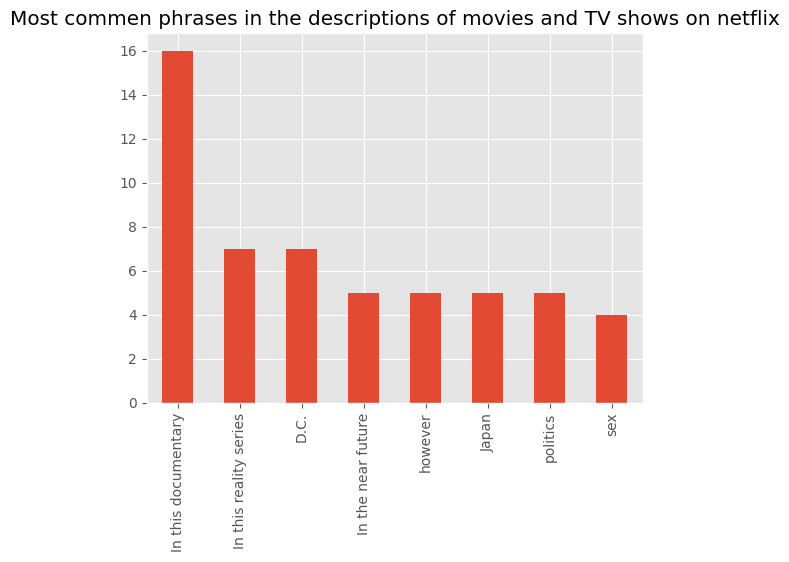

In [48]:
data['description'].str.split(', ', expand=True).stack().value_counts().head(8).plot(kind = 'bar', title = "Most commen phrases in the descriptions of movies and TV shows on netflix")
plt.show()

Next, we for each of the top 5 common phrases, we will find the pieces of content with descriptions containing that phrase

In [74]:
for phrase in common_words.index:
    print("\n\nMovies and TV shows on netflix with the phrase '" + phrase + "' in the description: ")
    rows = data[data['description'].str.contains(phrase)]
    print(rows['title'].head(5).to_string(dtype=False))



Movies and TV shows on netflix with the phrase 'In this documentary' in the description: 
230                  The River Runner
404     9to5: The Story of a Movement
727               Picture a Scientist
1039       Dark City Beneath the Beat
1956                Zulu Man in Japan


Movies and TV shows on netflix with the phrase 'In this reality series' in the description: 
184               Sparking Joy
1313    Buried by the Bernards
1868                    Deaf U
6378        Bringing Sexy Back
6618               Diva Brides


Movies and TV shows on netflix with the phrase 'D.C.' in the description: 
1059                                       House of Cards
2753    Dave Chappelle: The Kennedy Center Mark Twain ...
3605                                           The Family
3635                    Whitney Cummings: Can I Touch It?
4322               ReMastered: Who Killed Jam Master Jay?


Movies and TV shows on netflix with the phrase 'In the near future' in the description: 
1405    Ou

### 6- Has Netflix focused more on television series than films in recent years?
To answer this question, we will use a mask to count the number of rows where the content type is a TV show and compare it to the number of rows where the content type is a movie, only looking at contents that were added from 2020 onwards.
the rest of the block displays a verdict depending on the result.
- `[(data['type'] == 'TV Show') & (data['date_added'] >= '2020')]` : a mask to only show the content of type TV show and the date of which is from 2020 onwards.
- `len()` : to get the length of the data


In [18]:
netflix_series_count = len(data[(data['type'] == 'TV Show') & (data['date_added'] >= '2020')])
netflix_movies_count = len(data[(data['type'] == 'Movie') & (data['date_added'] >= '2020')])
print("Number of movies produced by Netflix since 2020: ", netflix_movies_count)
print("Number of TV series produced by Netflix since 2020: ", netflix_series_count)
if netflix_series_count > netflix_movies_count:
    print("Netflix has focused more on TV series.")
elif netflix_series_count < netflix_movies_count:
    print("Netflix has focused more on movies.")
else:
    print("Netflix has focused equally on TV series and films.")

Number of movies produced by Netflix since 2020:  6131
Number of TV series produced by Netflix since 2020:  2578
Netflix has focused more on movies.


### 7- Other informations obtained with EDA
 

#### The date of the earliest added content and the last

In [37]:
earliest = pd.to_datetime(data['date_added'], format='mixed').min()
print("The date of the earliest added content: ",earliest)
latest = pd.to_datetime(data['date_added'], format='mixed').max()
print("the date of the latest added content: ", latest)

The date of the earliest added content:  2008-01-01 00:00:00
the date of the latest added content:  2021-09-25 00:00:00
